<a href="https://colab.research.google.com/github/gonzoreyes07/Simulaci-n-1/blob/main/MC_Acierto_y_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [17]:
def f(x): # Llamamos f a la funcion objetivo
    return np.sqrt(np.arctan(x)) # Funcion objetivo

In [18]:
def AyE(a,b,c,n,f):
  u = np.random.uniform(0,1,2*n) #Generamos n numeros aleatorios con distribucion uniforme
  contador = 0 # Contador para el número de veces que el punto cae en la region
  for i in range(n):
    x = a + u[i]*(b-a)
    if f(x) > c*u[n + i]:
      contador += 1 # Si el punto cae dentro de la region, se suma un acierto al contador
  return c*(b-a)*(contador/n) #Obtenemos la probabilidad empirica

In [19]:
def MC_AE(a,b,c,N,n,f):
  I = [] # Lista para almacenar las medias obtenidas en cada uno de los experimentos
  for i in range(N):
    I.append(AyE(a,b,c,n,f)) # Obtenemos las medias y las guardamos
  return I

In [22]:
n = 100 # Cantidad de números aleatorios
N = 10000 # Número de veces que se repetirá el experimento
a = 0
b = 1
c = 1 # Valor de acotamiento de f

In [24]:
I = MC_AE(a,b,c,N,n,f)

In [30]:
media = np.mean(I) # Calculamos la media

In [31]:
desvest = np.std(I) # Calculo desviación estándar


In [45]:
# Nueva función para graficar
def grafica(I, true_value=None):
    plt.figure(figsize=(12, 6))

    # Calculo de la media acumulada para ver la convergencia
    acummedia = np.cumsum(I) / np.arange(1, len(I) + 1)

    # Gráfica para la media acumulada
    plt.plot(acummedia, 'r-', label='Media acumulada')

    # Agragamos el valor de la media para compararla
    plt.axhline(y=media, color='k', linestyle='--', label=f'Media: {media:.4f}')

    plt.xlabel('Iteración')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

In [46]:
print(f"Valor de la media: {media}")
print(f"Valor de la desviación estándar: {desvest}")

Valor de la media: 0.6300600000000001
Valor de la desviación estándar: 0.04814183627573838


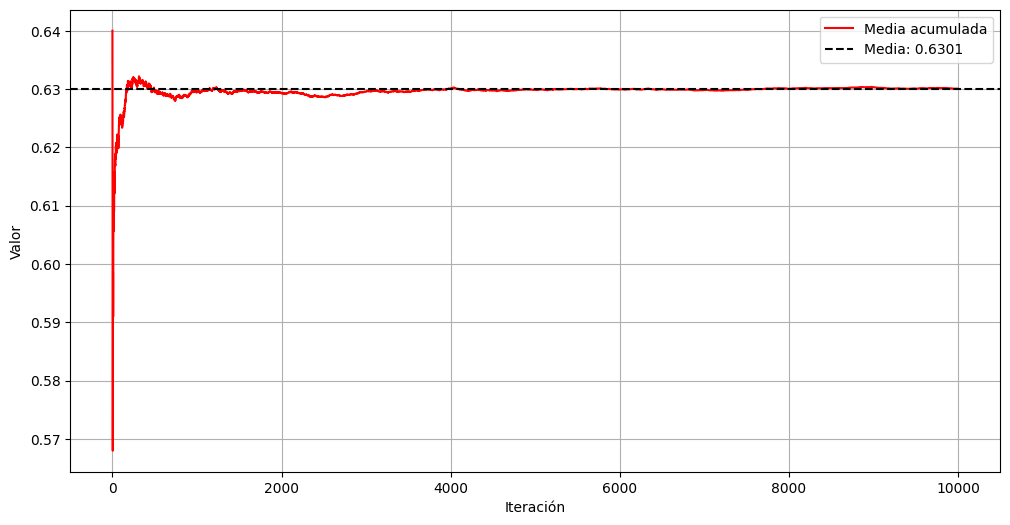

In [47]:
grafica(I)